In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def adaptive_ma_crossover_factor(df, volatility_window=20):
    """Dynamic MA crossover adjusted for market volatility"""
    # Volatility-based period adjustment
    returns = np.log(df['close']).diff()
    vol = returns.rolling(volatility_window, min_periods=1).std().fillna(0.01)
    short_period = np.clip((vol * 100).astype(int), 5, 20)
    long_period = short_period * 3
    
    # Adaptive MA calculation
    def rolling_ma(series, period):
        return series.rolling(period).mean()
    
    short_ma = pd.Series([
        rolling_ma(df['close'].loc[:idx], p).iloc[-1]
        for idx, p in zip(df.index, short_period)
    ], index=df.index)
    
    long_ma = pd.Series([
        rolling_ma(df['close'].loc[:idx], p).iloc[-1]
        for idx, p in zip(df.index, long_period)
    ], index=df.index)
    
    return (short_ma - long_ma) / long_ma

In [5]:
evaluator.set_factor(
    factor_data_or_func=adaptive_ma_crossover_factor,
    factor_name='adaptive_ma_crossover_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): -0.008361
   Rank_IC (Spearman): -0.032783
📊 信息比率:
   IR: -0.165995
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130365
   因子列: adaptive_ma_crossover_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


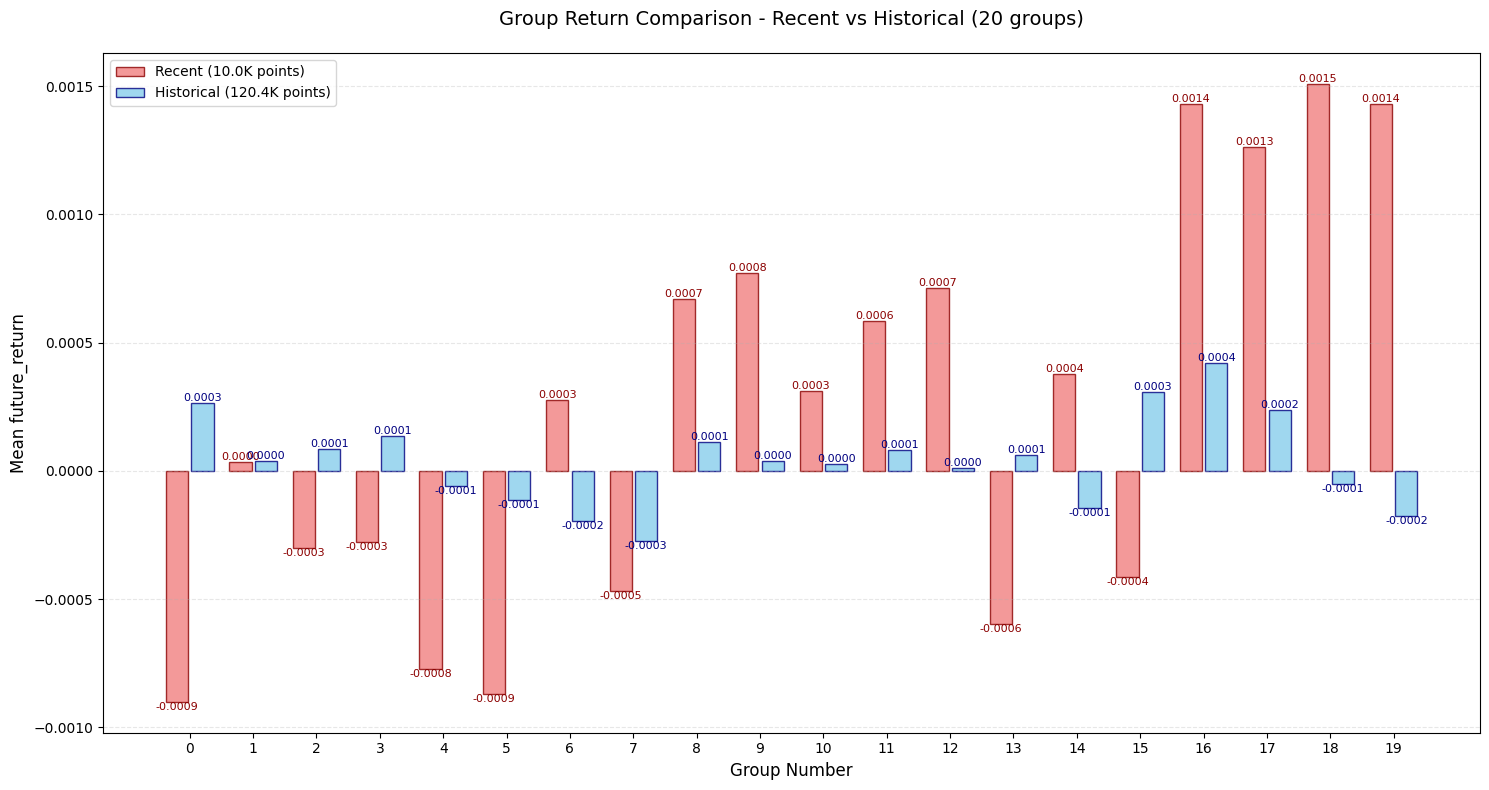

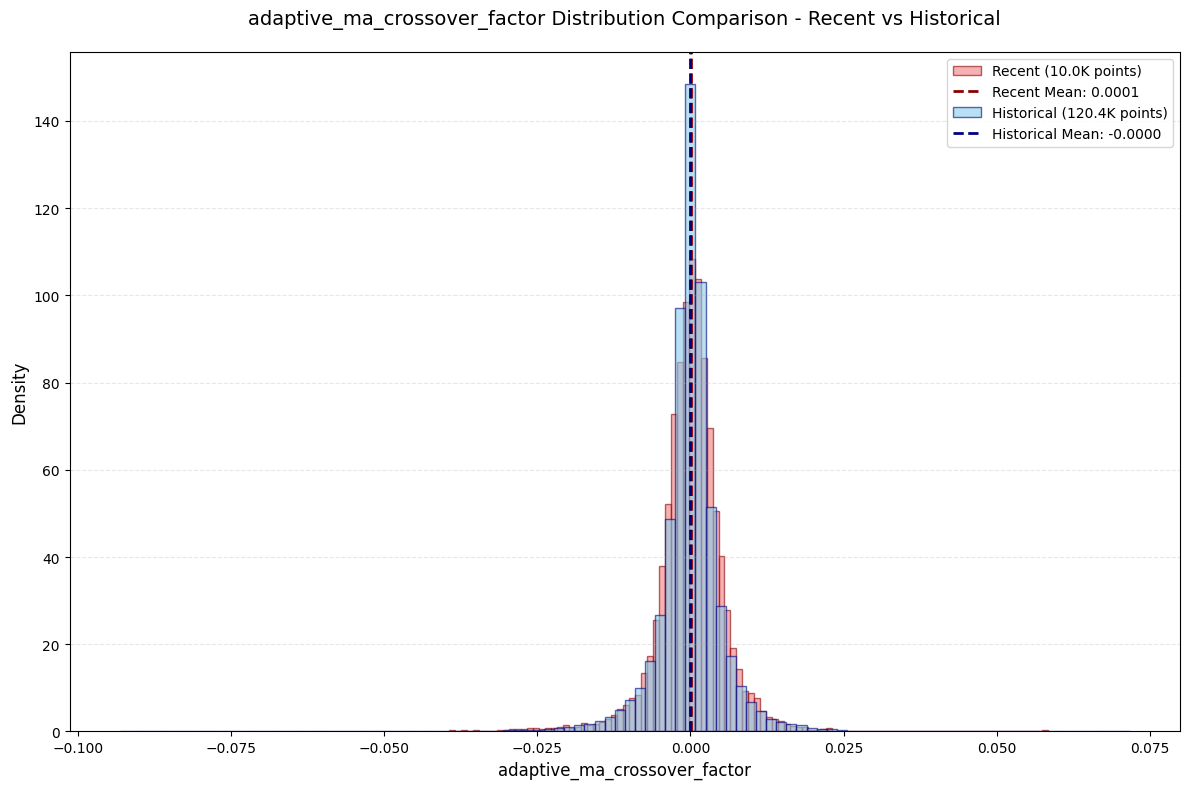

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)